In [1]:
import pandas as pd

In [6]:
df=pd.read_csv('MobilePhones.csv')

In [7]:
df.head()

,MobileName,RAM_GB,ROM_GB,Ratings,Reviews,Stars,ListPrice,SalesPrice,Year,Month
0,"Redmi 8 (Onyx Black, 64 GB)",4,64,674638,50064,4.4,10999,9999,2019,10
1,"Realme 5i (Forest Green, 64 GB)",4,64,243106,16497,4.5,10999,10999,2020,1
2,"Realme 5i (Aqua Blue, 64 GB)",4,64,243106,16497,4.5,10999,10999,2020,1
3,"Redmi 8 (Sapphire Blue, 64 GB)",4,32,674638,50064,4.4,10999,9999,2019,10
4,"POCO X2 (Matrix Purple, 128 GB)",6,64,133486,14732,4.5,19999,18499,2020,2


In [4]:
df.shape  #".shape" : show how many no. of rows and coloumn are there.

(120, 8)

In [ ]:
df.pop('MobileName')
df.pop('Ratings')
df.pop('Reviews')
df.pop('Stars')
df.pop('ListPrice')
df.pop('Month')


In [39]:
df.head()

,RAM_GB,ROM_GB,SalesPrice,Year
0,4,64,9999,2019
1,4,64,10999,2020
2,4,64,10999,2020
3,4,32,9999,2019
4,6,64,18499,2020


In [42]:
i=df['SalesPrice']


In [44]:
df.pop('SalesPrice')

0       9999
1      10999
2      10999
3       9999
4      18499
       ...  
115     1699
116    16999
117    19999
118      609
119    46999
Name: SalesPrice, Length: 120, dtype: int64

In [45]:
df.insert(0,'SalesPrice',i)

In [46]:
df.head()

,SalesPrice,RAM_GB,ROM_GB,Year
0,9999,4,64,2019
1,10999,4,64,2020
2,10999,4,64,2020
3,9999,4,32,2019
4,18499,6,64,2020


In [47]:
final_dataset=df
final_dataset.head()

,SalesPrice,RAM_GB,ROM_GB,Year
0,9999,4,64,2019
1,10999,4,64,2020
2,10999,4,64,2020
3,9999,4,32,2019
4,18499,6,64,2020


In [48]:
final_dataset['Current_Year']=2021

In [49]:
final_dataset['No_Year']=final_dataset['Current_Year']-final_dataset['Year']

In [50]:
final_dataset.head()

,SalesPrice,RAM_GB,ROM_GB,Year,Current_Year,No_Year
0,9999,4,64,2019,2021,2
1,10999,4,64,2020,2021,1
2,10999,4,64,2020,2021,1
3,9999,4,32,2019,2021,2
4,18499,6,64,2020,2021,1


In [52]:
final_dataset=final_dataset.drop(['Current_Year'],axis=1)

In [55]:
final_dataset.drop(['Year'],axis=1,inplace=True)

In [56]:
final_dataset.head()

,SalesPrice,RAM_GB,ROM_GB,No_Year
0,9999,4,64,2
1,10999,4,64,1
2,10999,4,64,1
3,9999,4,32,2
4,18499,6,64,1


In [57]:
final_dataset.corr()

,SalesPrice,RAM_GB,ROM_GB,No_Year
SalesPrice,1.000000,-0.253224,0.186678,0.150317
RAM_GB,-0.253224,1.000000,0.063945,0.161922
ROM_GB,0.186678,0.063945,1.000000,-0.020430
No_Year,0.150317,0.161922,-0.020430,1.000000


In [58]:
final_dataset=pd.get_dummies(final_dataset,drop_first=True)

In [59]:
final_dataset.head()

,SalesPrice,RAM_GB,ROM_GB,No_Year
0,9999,4,64,2
1,10999,4,64,1
2,10999,4,64,1
3,9999,4,32,2
4,18499,6,64,1


In [60]:
import seaborn as sns

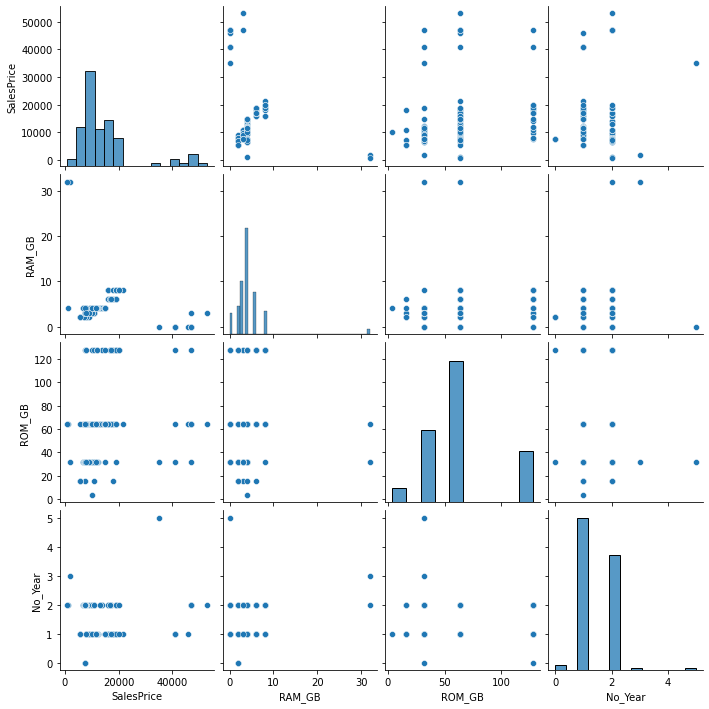

In [61]:
sns.pairplot(final_dataset)

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline

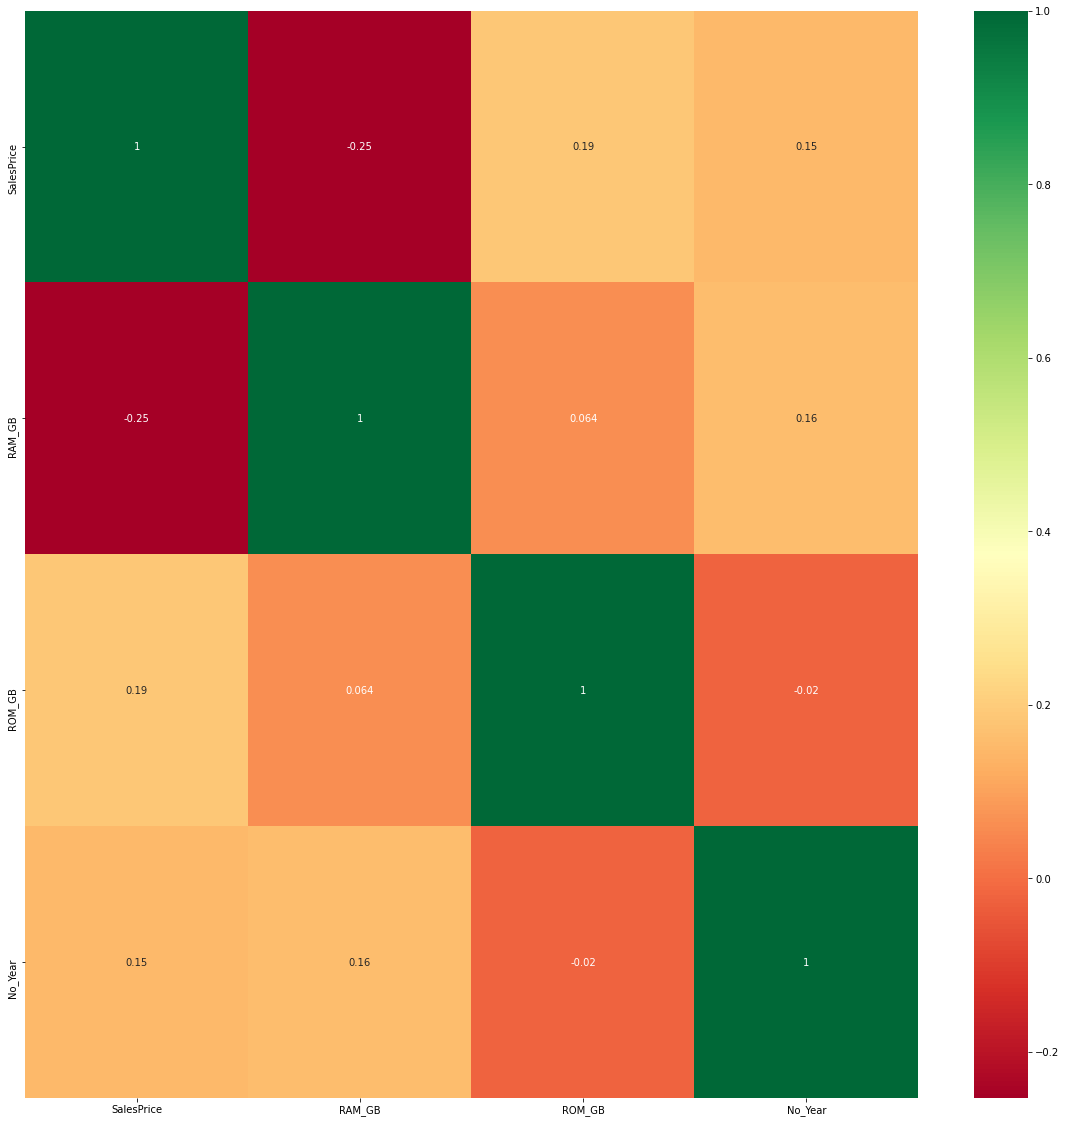

In [63]:
corrmat=final_dataset.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,20)) #plot heat map 
g=sns.heatmap(final_dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [64]:
#higly Green Colour shows that it is positively Correlated
#higly red Colour shows that it is negetively Correlated

In [65]:
#indipendent and dependent features:
X=final_dataset.iloc[:,1:]
y=final_dataset.iloc[:,0]

In [66]:
X.head()

,RAM_GB,ROM_GB,No_Year
0,4,64,2
1,4,64,1
2,4,64,1
3,4,32,2
4,6,64,1


In [67]:
y.head()

0     9999
1    10999
2    10999
3     9999
4    18499
Name: SalesPrice, dtype: int64

In [68]:
### Feature Importance

from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [69]:
final_dataset.head()

,SalesPrice,RAM_GB,ROM_GB,No_Year
0,9999,4,64,2
1,10999,4,64,1
2,10999,4,64,1
3,9999,4,32,2
4,18499,6,64,1


In [70]:
print(model.feature_importances_) 
#here 'SalesPrice' have higher feature importance


[0.85993888 0.07662005 0.06344107]


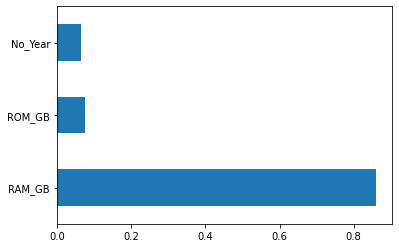

In [71]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [72]:
#Train Test Split

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [74]:
X_train

,RAM_GB,ROM_GB,No_Year
6,6,64,1
75,8,32,2
100,2,32,2
91,4,32,1
104,4,64,1
...,...,...,...
67,3,64,1
64,3,32,1
117,8,128,1
47,0,128,2


In [75]:
X_train.shape

(84, 3)

In [76]:
#Random Forest Regressor

In [77]:
from sklearn.ensemble import RandomForestRegressor

In [78]:
regressor=RandomForestRegressor()

In [79]:
import numpy as np

In [80]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [81]:
from sklearn.model_selection import RandomizedSearchCV

In [82]:
 #Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]


In [83]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [84]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [85]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [86]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [87]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [88]:
rf_random.best_score_

-8084542.589130473

In [89]:
predictions=rf_random.predict(X_test)

c:\users\jay\mobilepriceprediction\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalesPrice', ylabel='Density'>

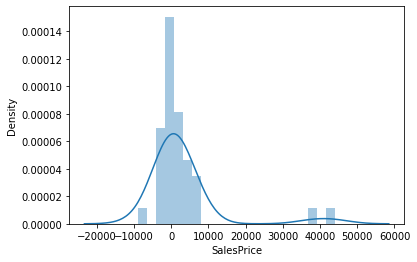

In [90]:
sns.distplot(y_test-predictions)

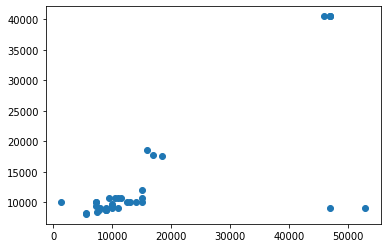

In [91]:
plt.scatter(y_test,predictions)

In [92]:
from sklearn import metrics

In [93]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 4572.564727621249
MSE: 103967144.28164494
RMSE: 10196.428015812446


In [94]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)